# Getting Started with Python

## Import Statements

We're importing:
* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [matplotlib.pyplot](https://matplotlib.org/stable/api/index.html)

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
# This allows us to create interactive plots with matplotlib
%matplotlib inline

## Importing Data

The original CBC dataset from 2018 came as three separate text (.csv) files.  Often times, we need to merge or **Join** information from different places.  First we need to read the .csv files with Pandas using the [.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.
* This will load the files as "DataFrames"
    * We can set the header, automatically interpret dates, an set our table indexes


### incident.csv

Contains postal code of the incident, province, municipality, along with the date and incident ID


In [22]:
incident = pd.read_csv(
    'Data/incident.csv',
    delimiter = ',',
    header = 0,
    parse_dates=['date'],
    index_col=['id_incident']
)
print('incident.csv')
print(incident)

incident.csv
                  date day_week prov      city_town postal_code location_type
id_incident                                                                  
1           2012-01-06      Fri   QC       Montreal     H3B 4W5         Urban
2           2012-01-11      Wed   AB         Onoway     T0E 1V0         Rural
3           2012-01-12      Thu   ON       Oakville     L6H 0G6         Urban
4           2012-02-03      Fri   ON        Toronto     M4C 1X5         Urban
5           2012-02-13      Mon   ON       Hamilton     L8K 5J4         Urban
...                ...      ...  ...            ...         ...           ...
500         2011-03-27      Sun   QC     Terrebonne     J6W 1H3         Urban
501         2010-10-21      Thu   QC       Cloutier     J0Z 1S0         Rural
502         2007-04-25      Wed   QC       Matagami     J0Y 2A0         Rural
503         2005-04-19      Tue   ON        Toronto     M5B 1W8         Urban
504         2013-07-09      Tue   SK  Prince Albert

### victim.csv

Contains information on the victms including age, race, etc.

In [21]:

victim = pd.read_csv(
    'Data/victim.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)
print('victim.csv')
victim

victim.csv


,id_victim,Name,age,gender,race,ethnic_ancestry,immigrant_refugee_naturalized,armed_type,cause_death,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary
id_incident,,,,,,,,,,,,,,,
1,0001-V1,*****,34.0,Male,Other,Iran,Yes,"Knife, axe, other cutting instruments",Gunshot,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...
2,0002-V1,*****,49.0,Male,Unknown,NaN,Unknown,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...
3,0003-V1,*****,43.0,Male,Caucasian,NaN,Unknown,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...
4,0004-V1,*****,29.0,Male,Black,NaN,Unknown,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com..."
5,0005-V1,*****,27.0,Male,Asian,Laos,Yes,Vehicle,Gunshot,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0500-V1,*****,49.0,Male,Unknown,NaN,Unknown,Vehicle,Gunshot,No,Yes,No,No,No,Police responding to a robbery call at a gas s...
501,0501-V1,*****,34.0,Male,Unknown,NaN,No,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Yes,Yes,√âric Pag√© had experienced a head injury at w...
502,0502-V1,*****,43.0,Male,Black,NaN,Yes,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Yes,No,Oumar Thiam moved to Quebec from Senegal with ...



### police.csv

Contaisn information about the police department and oficer involved

In [23]:

police = pd.read_csv(
    'Data/police.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)
print('police.csv')
print(police)

police.csv
                                            Department charge_type Charges  \
id_incident                                                                  
1            Service de police de la Ville de Montreal        None      No   
2                                                 RCMP        None      No   
3                       Halton Regional Police Service        None      No   
4                               Toronto Police Service        None      No   
5                              Hamilton Police Service        None      No   
...                                                ...         ...     ...   
500                    Service de police de Terrebonne        None      No   
501                                   Surete du Quebec        None      No   
502                                   Surete du Quebec        None      No   
503                             Toronto Police Service        None      No   
504                       Prince Albert Police Servic

## Joining Data

The three files share the same index **id_incident**.  This unique identifier can be used combine the three Dataframes into one.
* We can only join two dataframes at a time, but we can string together commands in one line.

Then we can change the index to the date using [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).

We can print the columns

In [29]:
# Join the incident and the victim records then join police to that.
Join = incident.join(victim).join(police)

PID_Canada = Join.set_index('date',drop = True)

# .columns will give us all the column names (aka "headers")
print(PID_Canada.columns)

# .count() gives us the number of non "null" (missing) values for each column.
PID_Canada.count()


Index(['day_week', 'prov', 'city_town', 'postal_code', 'location_type',
       'id_victim', 'Name', 'age', 'gender', 'race', 'ethnic_ancestry',
       'immigrant_refugee_naturalized', 'armed_type', 'cause_death',
       'taser_deployed', 'injured_officer', 'excited_delirium',
       'mentral_distress_disorder', 'substance_abuse', 'summary', 'Department',
       'charge_type', 'Charges', 'Officers Involved'],
      dtype='object')


day_week                         462
prov                             462
city_town                        462
postal_code                      462
location_type                    462
id_victim                        462
Name                             462
age                              455
gender                           462
race                             462
ethnic_ancestry                  107
immigrant_refugee_naturalized    462
armed_type                       462
cause_death                      462
taser_deployed                   462
injured_officer                  462
excited_delirium                 462
mentral_distress_disorder        462
substance_abuse                  462
summary                          462
Department                       462
charge_type                      462
Charges                          462
Officers Involved                462
dtype: int64

# Inspect at the data

Pandas has lots of functions we can use to inspect different variables.  One is [.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* It will calculate statistics for numeric data
* It is gives less information for text data
    * If we can list all unique text values with .unique()



In [38]:
print('Descriptive Statistics: Age\n')
print(PID_Canada['age'].describe())
print()
print('Descriptive Statistics: Prov\n')
print(PID_Canada['prov'].describe())
print()
print('Unique Values: Prov\n')
print(PID_Canada['prov'].unique())

Descriptive Statistics: Age

count    455.000000
mean      36.731868
std       11.775739
min       15.000000
25%       27.500000
50%       36.000000
75%       45.000000
max       77.000000
Name: age, dtype: float64

Descriptive Statistics: Prov

count     462
unique     12
top        ON
freq      152
Name: prov, dtype: object

Unique Values: Prov

['QC' 'AB' 'ON' 'NT' 'BC' 'NB' 'SK' 'NL' 'MB' 'NU' 'NS' 'YT']


## Working with Dates

We can [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) by a specific intervals (e.g. "Y": Yearly, "M", Monthly,' etc.).  Resample will aggregate the data over a given time interval, .count() specifies how to aggregate.
* *Note* this only works when you have a date set as an index.

In [47]:
Yearly = PID_Canada.resample('Y').count()


## The linregress() function calcualtes a linear regression between the year and the number of killings
LR = stats.linregress(Yearly.index.year,Yearly['id_victim'])

print('Linear Regression: Victims per Year')
print()
print(LR)

print()

Yearly

Linear Regression: Victims per Year

LinregressResult(slope=1.0485036119711042, intercept=-2080.252837977296, rvalue=0.7543604262227599, pvalue=0.0002978828736845745, stderr=0.22810752954681113, intercept_stderr=458.1555015697752)



,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,gender,race,...,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,Department,charge_type,Charges,Officers Involved
date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
2001-12-31,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2002-12-31,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2003-12-31,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2004-12-31,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
2005-12-31,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
2006-12-31,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2007-12-31,28,28,28,28,28,28,28,27,28,28,...,28,28,28,28,28,28,28,28,28,28
2008-12-31,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


# Plotting

We can use [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) (plt) to make scatter bar charts and line graphs.

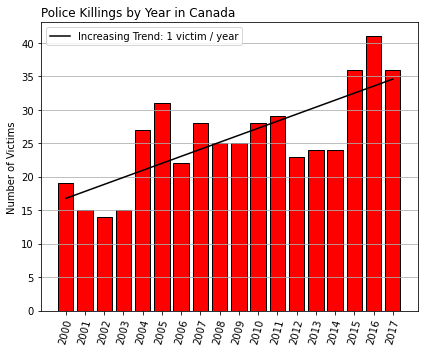

In [78]:
# We can create a figure size 5x4
plt.figure(figsize=(6,5))

# .scatter() allows us to plot points
plt.bar(Yearly.index.year.astype(int),
            Yearly['id_victim'],
           color='red',
           edgecolor='k')

# .plots() allows us to plot lines
plt.plot(Yearly.index.year.astype(int),
         Yearly.index.year*LR[0]+LR[1],
         color='k',
         label='Increasing Trend: '+str(int(LR[0]))+' victim / year')

# We can set some specifics here.
plt.xticks(Yearly.index.year.astype(int),Yearly.index.year.astype(int),rotation=75)
plt.title('Police Killings by Year in Canada',loc='left')
plt.ylabel('Number of Victims')
plt.grid(axis='y')

# Calling .legend() will display all entites we set a label for
plt.legend()

# .tight_layout() allows us to make sure things fit nicely
plt.tight_layout()


## Aggregating

The [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function allows us conduct specific queries like:
### What was the racial breakdown of victims?

In [81]:
# .groupby() accepts one or more records to aggregate by
# .count() tells us how to aggregate
Armed = PID_Canada.groupby(['armed_type']).count()

Armed['id_victim'].sort_values()

armed_type
Air gun, replica gun                      27
Bat, club, other swinging object          20
Firearm                                   88
Knife, axe, other cutting instruments    153
None                                     116
Other weapons                             12
Unknown                                   23
Vehicle                                   23
Name: id_victim, dtype: int64

## Editing data
* We can create a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp) define the replacements we want to make
* We can use some of pandas special functions to query and manipulate our data
    * The [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function allows us to search for records
    * The [.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) function lets us replace values

In [82]:

# Dictionaries use keys (eg. 'Vehicle') an values (eg. 'Other weapon')
# They let us quickly look up values by a key
replace_dict = {
    'Air gun, replica gun':'Other weapons',
    'Bat, club, other swinging object':'Other weapons',
    'Vehicle':'Other weapons',
    'Knife, axe, other cutting instruments':'Knife',
    'Unknown':'None'
          }

# We can loop through te keys in the dictionary and use them to replace the disired values
# .loc[] is a search command that allows us to perform specific querries
# we can use it in combination with an equal sign (=) to replace values for a given column(s)
for r in replace_dict.keys():
    PID_Canada.loc[PID_Canada['armed_type']==r,'armed_type']=replace_dict[r]
    
Armed['id_victim'].sort_values()

armed_type
Other weapons                             12
Bat, club, other swinging object          20
Unknown                                   23
Vehicle                                   23
Air gun, replica gun                      27
Firearm                                   88
None                                     116
Knife, axe, other cutting instruments    153
Name: id_victim, dtype: int64

## Pie Charts

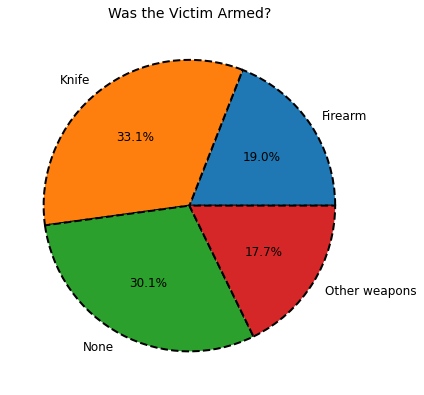

In [90]:
# Just making the same pic graph again
plt.figure(figsize=(6,6))
Armed = PID_Canada.groupby(['armed_type']).count()
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 12},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'dashed'}
)
plt.title('Was the Victim Armed?', fontsize=14)
plt.tight_layout()

## More complex queries

Which police departments in Canada are most likely to kill an unarmed person?  Groupby can also accept multiple inputs.  

In [103]:
# Groupby allows us to search fo multiple records
PoliceForce = PID_Canada.groupby(['Department','armed_type']).count().sort_values(by = 'id_victim',ascending=False)
PoliceForce.head(10)

day_week  prov  \
Department                                armed_type                      
RCMP                                      None                 42    42   
                                          Firearm              29    29   
                                          Knife                24    24   
                                          Other weapons        21    21   
Toronto Police Service                    None                 18    18   
                                          Knife                17    17   
Service de police de la Ville de Montreal None                 13    13   
Surete du Quebec                          Knife                12    12   
Service de police de la Ville de Montreal Knife                11    11   
Edmonton Police Service                   None                 11    11   

                                                         city_town  \
Department                                armed_type                 
RCMP                                      None                  42   
                                          Firearm               29   
                                          Knife                 24   
                                          Other weapons         21   
Toronto Police Service                    None                  18   
                                          Knife                 17   
Service de police de la Ville de Montreal None                  13   
Surete du Quebec                          Knife                 12   
Service de police de la Ville de Montreal Knife                 11   
Edmonton Police Service                   None                  11   

                                                         postal_code  \
Department                                armed_type                   
RCMP                                      None                    42   
                                          Firearm                 29   
                                          Knife                   24   
                                          Other weapons           21   
Toronto Police Service                    None                    18   
                                          Knife                   17   
Service de police de la Ville de Montreal None                    13   
Surete du Quebec                          Knife                   12   
Service de police de la Ville de Montreal Knife                   11   
Edmonton Police Service                   None                    11   

                                                         location_type  \
Department                                armed_type                     
RCMP                                      None                      42   
                                          Firearm                   29   
                                          Knife                     24   
                                          Other weapons             21   
Toronto Police Service                    None                      18   
                                          Knife                     17   
Service de police de la Ville de Montreal None                      13   
Surete du Quebec                          Knife                     12   
Service de police de la Ville de Montreal Knife                     11   
Edmonton Police Service                   None                      11   

                                                         id_victim  Name  age  \
Department                                armed_type                            
RCMP                                      None                  42    42   42   
                                          Firearm               29    29   28   
                                          Knife                 24    24   24   
                                          Other weapons         21    21   20   
Toronto Police Service                    None                  18    18   

## Formatting the result

Most columns are duplicated, we only need to keep one ('id_victim')

Department                       armed_type   
RCMP                             None             42
                                 Firearm          29
                                 Knife            24
                                 Other weapons    21
Toronto Police Service           None             18
                                                  ..
Royal Newfoundland Constabulary  Knife             1
                                 Firearm           1
Regina Police Service            None              1
Kingston Police                  Other weapons     1
Abbotsford Police Department     None              1
Name: id_victim, Length: 130, dtype: int64

armed_type                                          Firearm  Knife  None  \
Department                                                                 
Abbotsford Police Department                            NaN    NaN   1.0   
Windsor Police Service                                  NaN    NaN   1.0   
Victoria Police Depart

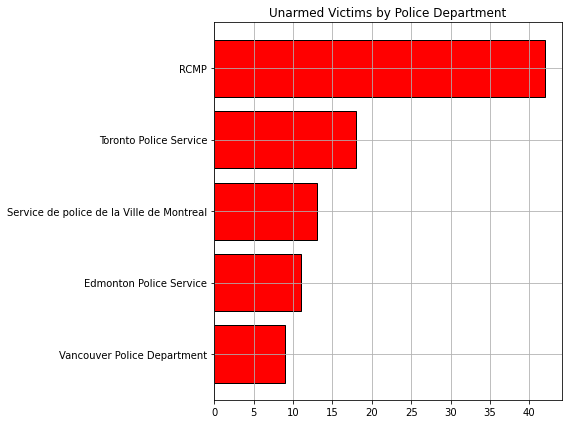

In [114]:
Temp=PoliceForce['id_victim']
print(Temp)
print()
PoliceForce_by_ArmedType = Temp.unstack().sort_values(by='None')#,ascending=False)
print(PoliceForce_by_ArmedType)
print()
Top5_Unnarmed_Killings = PoliceForce_by_ArmedType.dropna()[-5:]
print(Top5_Unnarmed_Killings['None'])
print()


fig,ax= plt.subplots(1,1,figsize=(8,6))

ax.barh(Top5_Unnarmed_Killings.index,
        Top5_Unnarmed_Killings['None'],
        facecolor='#FF0000',
        edgecolor='black'
       )

ax.set_title('Unarmed Victims by Police Department')
plt.grid()
plt.tight_layout()


## The Demographic Distribution

BIPOC are severely overrepresented.

In [116]:
PID_Canada.groupby('race').count()['id_victim'].sort_values()

race
Latin American      3
Arab                5
Other               5
South Asian        10
Asian              15
Black              43
Indigenous         70
Unknown            99
Caucasian         212
Name: id_victim, dtype: int64

## Normalizing

Canada is predominately white, we have to scale each group by the size of their population to calculate a police killing rate
* We want calculate the Police Killing Rate per Million Residents per Year for White, Black, and Indigenous people.
* What should we use as the scale factor?
    * Hint the dataset spans the years 2000 to 2017
    

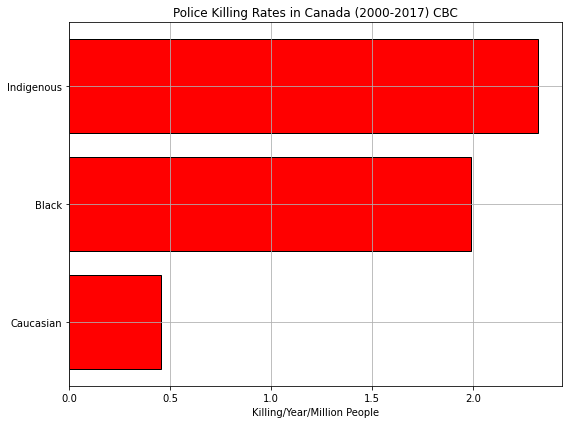

In [119]:
Race=['Caucasian','Black','Indigenous']
Population=[25803368,1198545,1673780]

scale = 1e6/18

Count = PID_Canada.groupby('race')['id_victim'].count()

plt.figure(figsize=(8,6))

i=0
for race,population in (zip(Race,Population)):
    if race == 'Total Population':
        rate=((Count.sum()/population)*scale)
    else:
        rate=((Count[race]/population)*1e6/18)
    plt.barh(i,rate,color='#FF0000',edgecolor='black')
    i += 1
plt.yticks([0,1,2],Race)
plt.title('Police Killing Rates in Canada (2000-2017) CBC')
plt.xlabel('Killing/Year/Million People')
plt.tight_layout()
    
plt.grid()

## Saving Data

* We can save our data easily using the [.tocsv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) function



In [ ]:
PID_Canada.to_csv('Data/PID_Canada.csv')
print('Data Saved')
print(PID_Canada)